In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader

from datetime import datetime

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [3]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-12-01,3248.949951,3157.179932,3188.500000,3220.080078,4544400.0,3220.080078,AMAZON
2020-12-02,3232.000000,3173.260010,3221.649902,3203.530029,3129300.0,3203.530029,AMAZON
2020-12-03,3228.639893,3181.310059,3205.459961,3186.729980,2892000.0,3186.729980,AMAZON
2020-12-04,3198.209961,3158.760010,3198.209961,3162.580078,2913600.0,3162.580078,AMAZON
2020-12-07,3180.760010,3141.689941,3156.479980,3158.000000,2751300.0,3158.000000,AMAZON
2020-12-08,3184.129883,3120.020020,3158.899902,3177.290039,3286300.0,3177.290039,AMAZON
2020-12-09,3174.429932,3088.000000,3167.889893,3104.199951,4100800.0,3104.199951,AMAZON
2020-12-10,3142.100098,3076.000000,3088.989990,3101.489990,3030200.0,3101.489990,AMAZON
2020-12-11,3118.669922,3072.820068,3096.659912,3116.419922,3064700.0,3116.419922,AMAZON


In [4]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,93.856925,91.202192,92.503820,92.594861,1.453323e+08,92.035195
std,21.160906,20.575948,21.053940,20.841387,8.027752e+07,21.200315
min,57.125000,53.152500,57.020000,56.092499,2.019780e+07,55.291519
25%,75.765623,73.751875,74.308752,74.888123,9.684185e+07,73.687557
50%,88.527500,86.404999,87.843750,87.915001,1.297170e+08,87.605637
75%,116.053753,112.820002,114.645002,114.962500,1.830576e+08,114.764503
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-12-16 to 2020-12-14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          252 non-null    float64
 1   Low           252 non-null    float64
 2   Open          252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    float64
 5   Adj Close     252 non-null    float64
 6   company_name  252 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


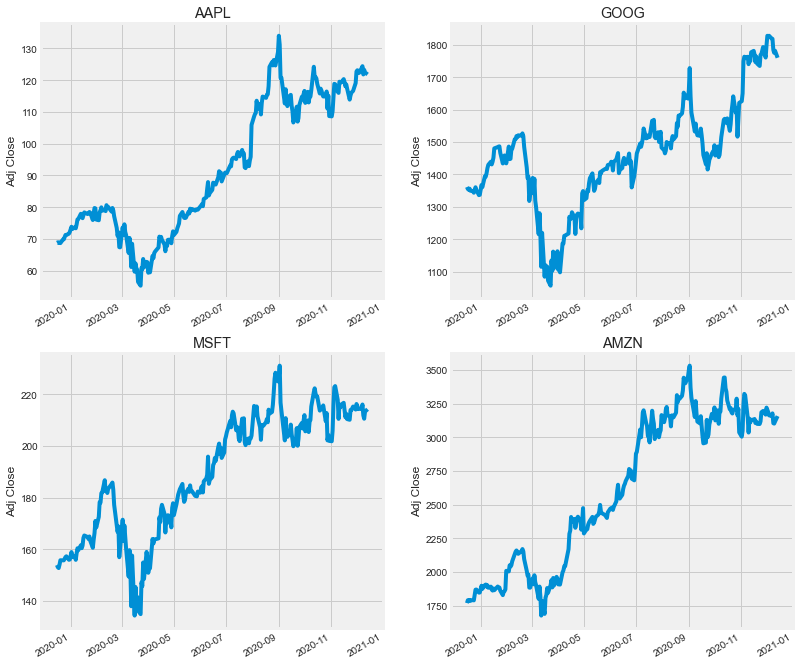

In [6]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

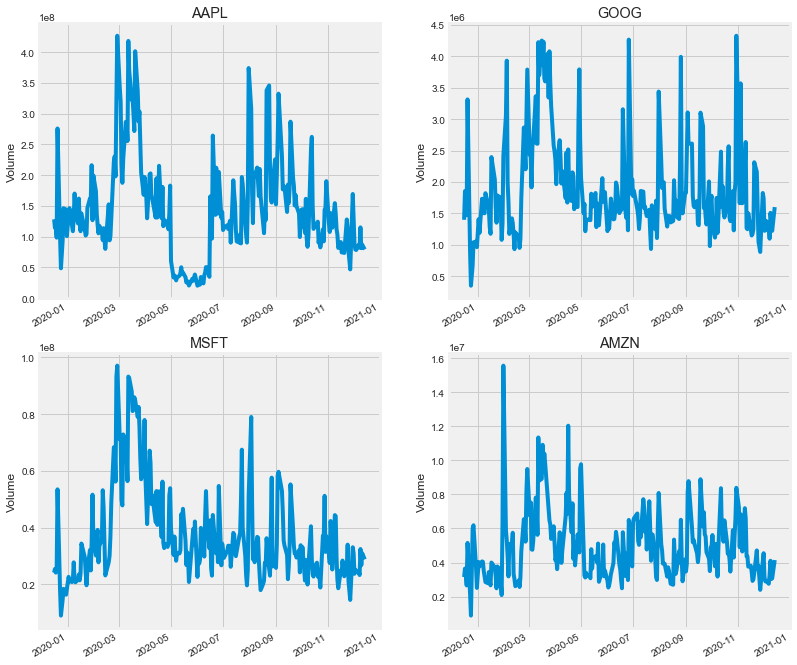

In [7]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

# What was the correlation between different stocks closing prices?

In [8]:
#  Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-16,68.802635,1361.170044,153.899643,1769.209961
2019-12-17,68.937851,1355.119995,153.068451,1790.660034
2019-12-18,68.773132,1352.619995,152.751816,1784.030029
2019-12-19,68.841965,1356.040039,154.077759,1792.280029
2019-12-20,68.699387,1349.589966,155.759949,1786.500000


In [9]:
# pct_change() - Computes the percentage change from the immediately previous row by default.
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-16,NaN,NaN,NaN,NaN
2019-12-17,0.001965,-0.004445,-0.005401,0.012124
2019-12-18,-0.002389,-0.001845,-0.002069,-0.003703
2019-12-19,0.001001,0.002528,0.008680,0.004624
2019-12-20,-0.002071,-0.004757,0.010918,-0.003225


C:\Users\hc\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


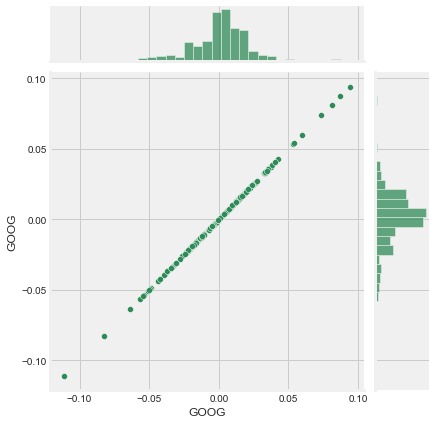

In [10]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

C:\Users\hc\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


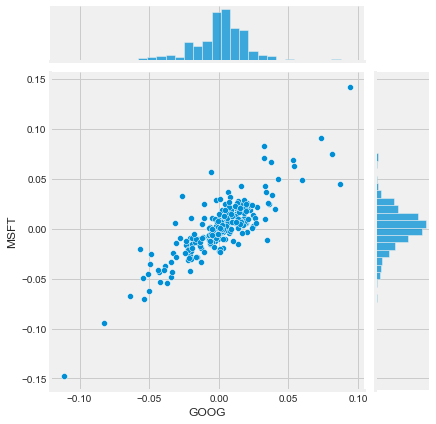

In [11]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

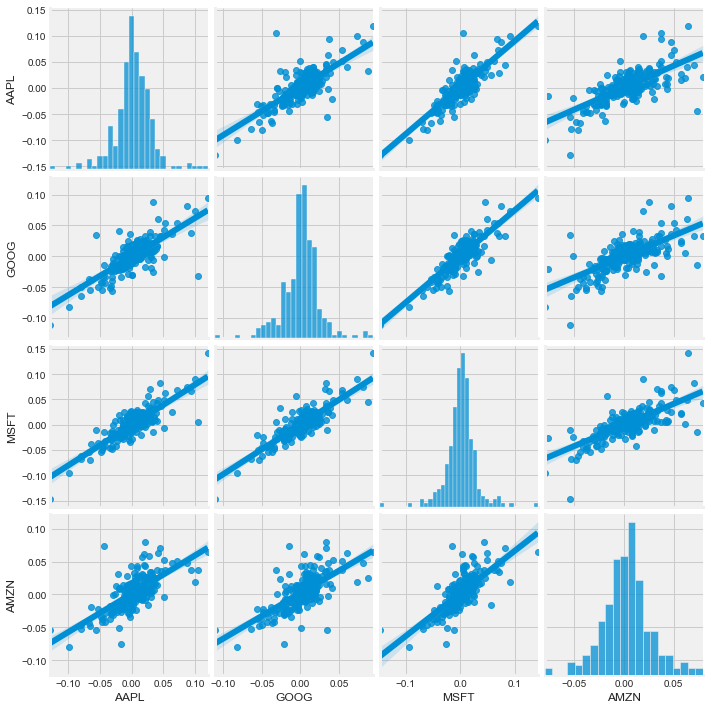

In [12]:
sns.pairplot(tech_rets, kind='reg')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

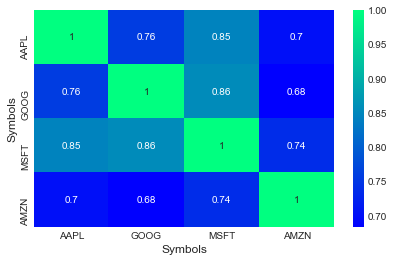

In [13]:
# Correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='winter')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

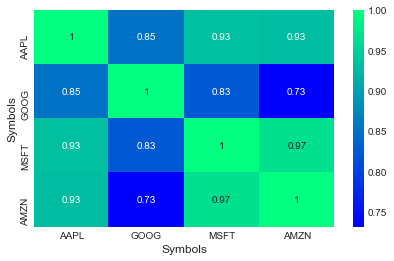

In [14]:
sns.heatmap(closing_df.corr(), annot=True, cmap='winter')

# Predicting the closing price stock price of APPLE inc - 

In [15]:
df = DataReader('AAPL', data_source='yahoo', start='2000-01-01', end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.785456
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.855168
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.783068
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.794528
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.725771
...,...,...,...,...,...,...
2020-12-08,124.980003,123.089996,124.370003,124.379997,82225500.0,124.379997
2020-12-09,125.949997,121.000000,124.529999,121.779999,115089200.0,121.779999
2020-12-10,123.870003,120.150002,120.500000,123.239998,81312200.0,123.239998


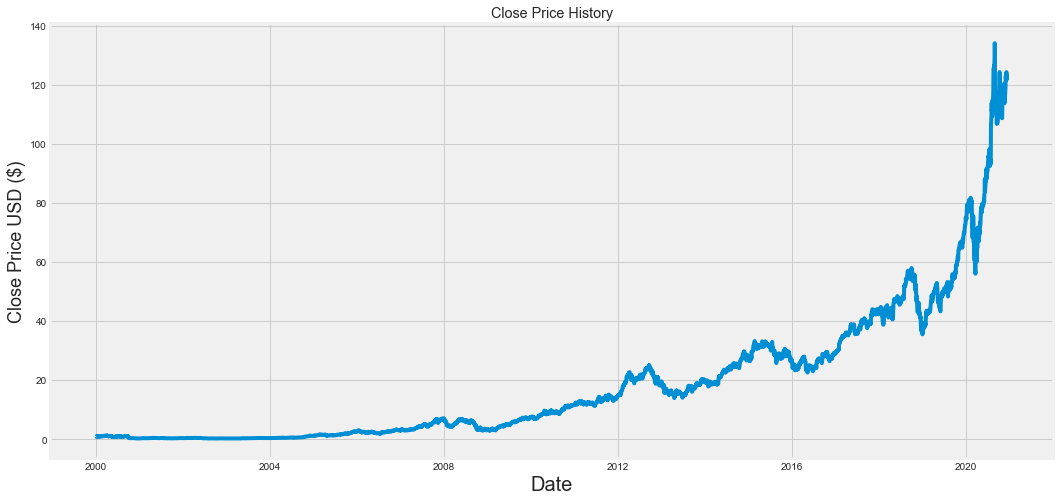

In [16]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [17]:
data = df.filter(['Close'])
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

4219

In [18]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00510418],
       [0.00571244],
       [0.00508335],
       ...,
       [0.91832516],
       [0.91212866],
       [0.90742522]])

In [19]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00510418, 0.00571244, 0.00508335, 0.00518334, 0.00458341,
       0.00488338, 0.00476672, 0.00443343, 0.00406265, 0.00470007,
       0.00494587, 0.00517917, 0.00535415, 0.00581659, 0.00567077,
       0.00533332, 0.00573327, 0.00559578, 0.00558329, 0.00502502,
       0.00516667, 0.00493337, 0.00483755, 0.00513751, 0.00544997,
       0.00585408, 0.00590824, 0.00575826, 0.00581659, 0.00549996,
       0.00597074, 0.00618321, 0.00585825, 0.00590824, 0.00566661,
       0.00583742, 0.0059999 , 0.00593012, 0.00560828, 0.00579992,
       0.00589158, 0.00693728, 0.00638318, 0.00678313, 0.00662898,
       0.00644151, 0.00638318, 0.00639985, 0.00663315, 0.00633736,
       0.00586658, 0.0059999 , 0.00635402, 0.00658316, 0.00644984,
       0.00724557, 0.00786216, 0.00767052, 0.00749554, 0.00755387])]
[0.0075247039312146885]

[array([0.00510418, 0.00571244, 0.00508335, 0.00518334, 0.00458341,
       0.00488338, 0.00476672, 0.00443343, 0.00406265, 0.00470007,
       0.00494587, 0.00517917, 0.

In [20]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4159, 60, 1)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [23]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
#Train the model
model.fit(x_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
416/416 [==============================] - 16s 38ms/step - loss: 8.0615e-05
Epoch 2/20
416/416 [==============================] - 16s 38ms/step - loss: 2.1735e-05
Epoch 3/20
416/416 [==============================] - 16s 39ms/step - loss: 2.0515e-05
Epoch 4/20
416/416 [==============================] - 16s 38ms/step - loss: 1.6945e-05
Epoch 5/20
416/416 [==============================] - 16s 38ms/step - loss: 1.4084e-05
Epoch 6/20
416/416 [==============================] - 16s 39ms/step - loss: 1.4154e-05
Epoch 7/20
416/416 [==============================] - 17s 40ms/step - loss: 1.3801e-05
Epoch 8/20
416/416 [==============================] - 17s 40ms/step - loss: 1.5381e-05
Epoch 9/20
416/416 [==============================] - 17s 40ms/step - loss: 1.1634e-05
Epoch 10/20
416/416 [==============================] - 17s 40ms/step - loss: 1.1394e-05
Epoch 11/20
416/416 [==============================] - 17s 41ms/step - loss: 8.8773e-06
Epoch 12/20
416/416 [====================

In [25]:
test_data = scaled_data[training_data_len - 30: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [26]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [27]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_test

array([[[0.1826353 ],
        [0.18261663],
        [0.18457639],
        ...,
        [0.20915724],
        [0.20925057],
        [0.21081836]],

       [[0.18261663],
        [0.18457639],
        [0.18465105],
        ...,
        [0.20925057],
        [0.21081836],
        [0.21113565]],

       [[0.18457639],
        [0.18465105],
        [0.18481902],
        ...,
        [0.21081836],
        [0.21113565],
        [0.21484985]],

       ...,

       [[0.8353811 ],
        [0.82201747],
        [0.79588748],
        ...,
        [0.92213268],
        [0.92683606],
        [0.90742522]],

       [[0.82201747],
        [0.79588748],
        [0.82007642],
        ...,
        [0.92683606],
        [0.90742522],
        [0.91832516]],

       [[0.79588748],
        [0.82007642],
        [0.83299207],
        ...,
        [0.90742522],
        [0.91832516],
        [0.91212866]]])

In [28]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [29]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((y_test-predictions) ** 2)))
rmse

1.3987206857854475

C:\Users\hc\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


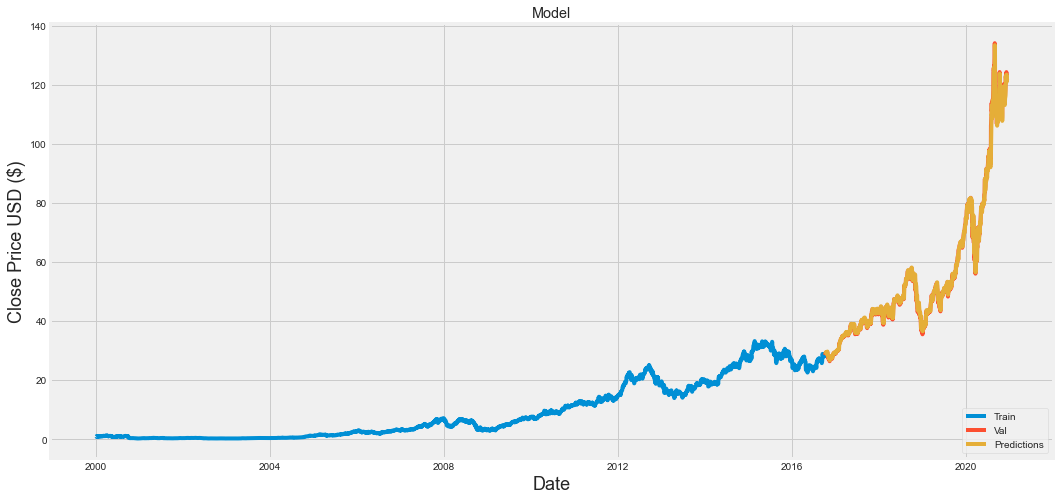

In [30]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [31]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2016-10-07,28.514999,28.606380
2016-10-10,29.012501,28.683813
2016-10-11,29.075001,29.081181
2016-10-12,29.334999,29.233650
2016-10-13,29.245001,29.447401
...,...,...
2020-12-08,124.379997,122.679230
2020-12-09,121.779999,123.539841
2020-12-10,123.239998,121.044243
